In [152]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline

# Read in data and display first 5 rows
data_white = pd.read_csv('../data/winequality/winequality-white.csv')
data_white.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [162]:
# Labels are the values we want to predict
labels_white = np.array(data_white['quality'])

# Remove the labels from the features
# axis 1 refers to the columns
features_white = data_white.drop('quality', axis = 1)

# Saving feature names for later use                  
feature_list = list(features_white.columns)

# Convert to numpy array
features_white = np.array(features_white)

features_white

array([[ 7.  ,  0.27,  0.36, ...,  3.  ,  0.45,  8.8 ],
       [ 6.3 ,  0.3 ,  0.34, ...,  3.3 ,  0.49,  9.5 ],
       [ 8.1 ,  0.28,  0.4 , ...,  3.26,  0.44, 10.1 ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
       [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
       [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]])

In [163]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features_white, labels_white, test_size = 0.25, random_state = 42)

In [164]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (3673, 11)
Training Labels Shape: (3673,)
Testing Features Shape: (1225, 11)
Testing Labels Shape: (1225,)


In [156]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('pH')]

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)

print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  2.72


In [157]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [168]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.42


In [114]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 92.38 %.


In [124]:
# Get numerical feature importances
importances_white = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances_white)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: alcohol              Importance: 0.24
Variable: volatile acidity     Importance: 0.12
Variable: free sulfur dioxide  Importance: 0.12
Variable: residual sugar       Importance: 0.07
Variable: total sulfur dioxide Importance: 0.07
Variable: pH                   Importance: 0.07
Variable: fixed acidity        Importance: 0.06
Variable: citric acid          Importance: 0.06
Variable: chlorides            Importance: 0.06
Variable: density              Importance: 0.06
Variable: sulphates            Importance: 0.06


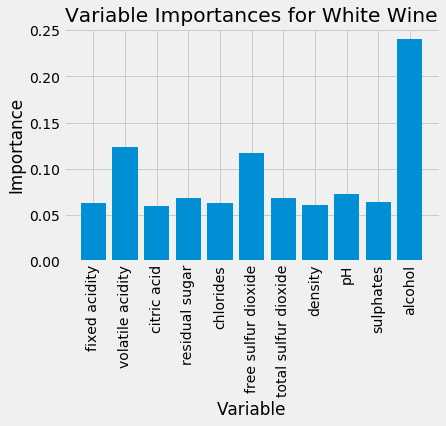

In [138]:
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances_white, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances for White Wine');
plt.savefig('variable_importance_white.png', dpi = 600, bbox_inches ='tight')

In [185]:
test_data_white = pd.DataFrame(test_features)
test_data_white.columns = ['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar', 'Chlorides', 'Free Sulfur Dioxide', 'Total Sulfur Dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol']
test_data_white['Predicted Quality'] = predictions
test_data_white['Actual Quality'] = test_labels
test_data_white.to_csv('test_data_white.csv')
test_data_white.head(5)

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Predicted Quality,Actual Quality
0,6.0,0.29,0.41,10.8,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667,6.894,7
1,5.4,0.53,0.16,2.7,0.036,34.0,128.0,0.98856,3.20,0.53,13.200000,7.533,8
2,7.1,0.25,0.39,2.1,0.036,30.0,124.0,0.99080,3.28,0.43,12.200000,6.759,8
3,7.3,0.28,0.35,1.6,0.054,31.0,148.0,0.99178,3.18,0.47,10.700000,5.139,5
4,6.5,0.32,0.34,5.7,0.044,27.0,91.0,0.99184,3.28,0.60,12.000000,6.832,7


In [169]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the two most important features
important_indices = [feature_list.index('alcohol'), feature_list.index('volatile acidity'), feature_list.index('free sulfur dioxide'), feature_list.index('residual sugar'), feature_list.index('total sulfur dioxide'), feature_list.index('pH')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.44 degrees.
Accuracy: 92.01 %.


In [187]:
data_red = pd.read_csv('../data/winequality/winequality-red.csv')
data_red.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [188]:
# Labels are the values we want to predict
labels = np.array(data_red['quality'])

# Remove the labels from the features
# axis 1 refers to the columns
features_red = data_red.drop('quality', axis = 1)

# Saving feature names for later use                  
feature_list = list(features_red.columns)

# Convert to numpy array
features_red = np.array(features_red)

features_red

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [189]:
train_features, test_features, train_labels, test_labels = train_test_split(features_red, labels, test_size = 0.25, random_state = 42)

In [190]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1199, 11)
Training Labels Shape: (1199,)
Testing Features Shape: (400, 11)
Testing Labels Shape: (400,)


In [191]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('pH')]

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)

print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  2.35


In [192]:
# Instantiate model with 1000 decision trees
rf_red = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf_red.fit(train_features, train_labels);

In [193]:
# Use the forest's predict method on the test data
predictions = rf_red.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.42


In [194]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 92.27 %.


In [195]:
# Get numerical feature importances
importances_red = list(rf_red.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances_red)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: alcohol              Importance: 0.29
Variable: sulphates            Importance: 0.14
Variable: volatile acidity     Importance: 0.11
Variable: total sulfur dioxide Importance: 0.08
Variable: chlorides            Importance: 0.07
Variable: residual sugar       Importance: 0.06
Variable: pH                   Importance: 0.06
Variable: fixed acidity        Importance: 0.05
Variable: citric acid          Importance: 0.05
Variable: density              Importance: 0.05
Variable: free sulfur dioxide  Importance: 0.04


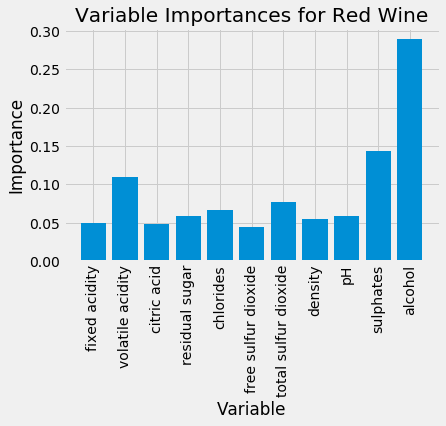

In [196]:
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances_red, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances for Red Wine');
plt.savefig('variable_importance_red.png', dpi = 600, bbox_inches ='tight')

In [198]:
test_data_red = pd.DataFrame(test_features)
test_data_red.columns = ['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar', 'Chlorides', 'Free Sulfur Dioxide', 'Total Sulfur Dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol']
test_data_red['Predicted Quality'] = predictions
test_data_red['Actual Quality'] = test_labels
test_data_red.to_csv('test_data_red.csv')
test_data_red.head(5)

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Predicted Quality,Actual Quality
0,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6,5.332,6
1,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5,5.129,5
2,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9,5.477,6
3,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8,5.235,5
4,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6,5.981,6
